 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

In [2]:
# Set the pathway for each csv file

whale_returns_path = Path('Resources/whale_returns.csv')
algo_returns_path = Path('Resources/algo_returns.csv')
sp500_history_path = Path('Resources/sp500_history.csv')

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns = pd.read_csv(whale_returns_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [4]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns = whale_returns.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algorithmic_returns = pd.read_csv(algo_returns_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
algorithmic_returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [7]:
# Count nulls
algorithmic_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algorithmic_returns = algorithmic_returns.dropna()

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500_closing = pd.read_csv(sp500_history_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_closing

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [10]:
# Check Data Types
sp500_closing["Close"].dtypes


dtype('O')

In [11]:
# Fix Data Types
sp500_closing["Close"] = sp500_closing["Close"].str.replace("$", "")


C:\Users\17633\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [12]:
sp500_closing["Close"] = sp500_closing["Close"].astype("float")


In [13]:
# Calculate Daily Returns
sp500_closing_returns = sp500_closing.pct_change()


In [14]:
# Drop nulls
sp500_closing_returns = sp500_closing_returns.dropna()

In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp500_closing_returns = sp500_closing_returns.rename(columns= {"Close":"S&P Returns"})


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns, algorithmic_returns, sp500_closing_returns], axis = "columns", join = "inner")
combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

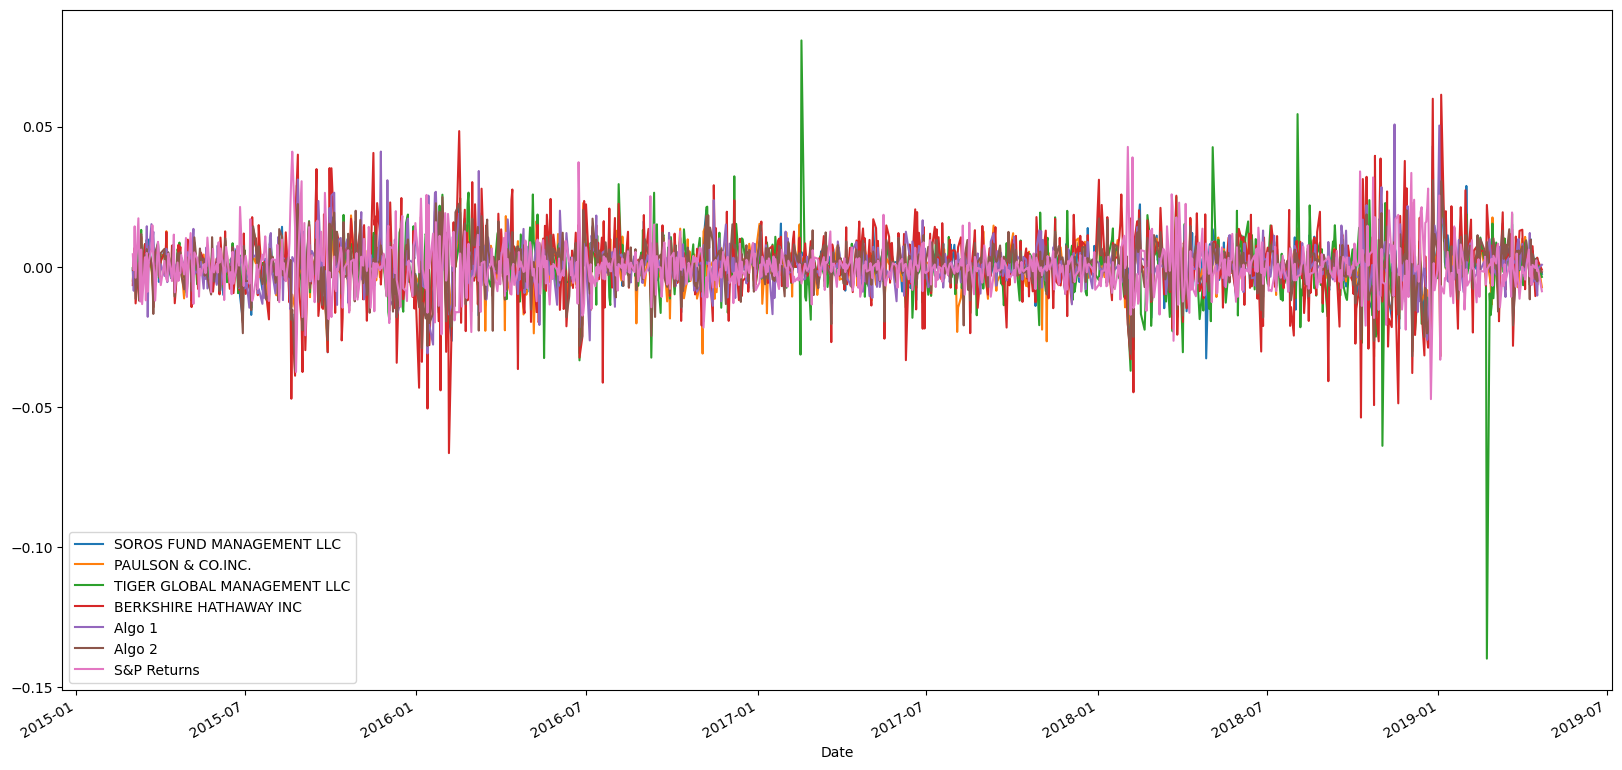

In [17]:
# Plot daily returns of all portfolios
combined_returns.plot(legend = True, figsize=(20,10))


#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

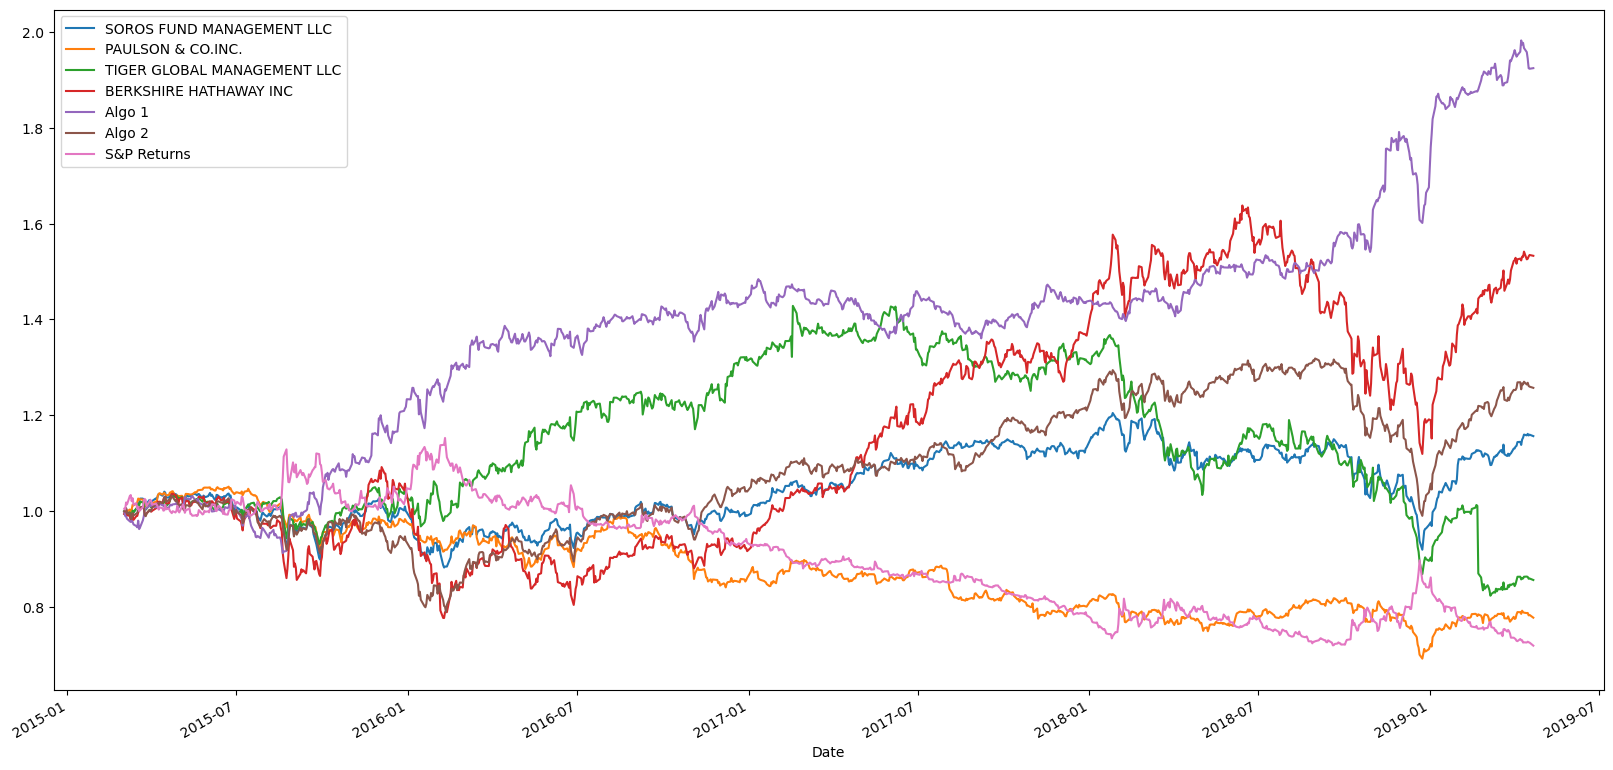

In [18]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod()
# Plot cumulative returns
cumulative_returns.plot(legend=True, figsize = (20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

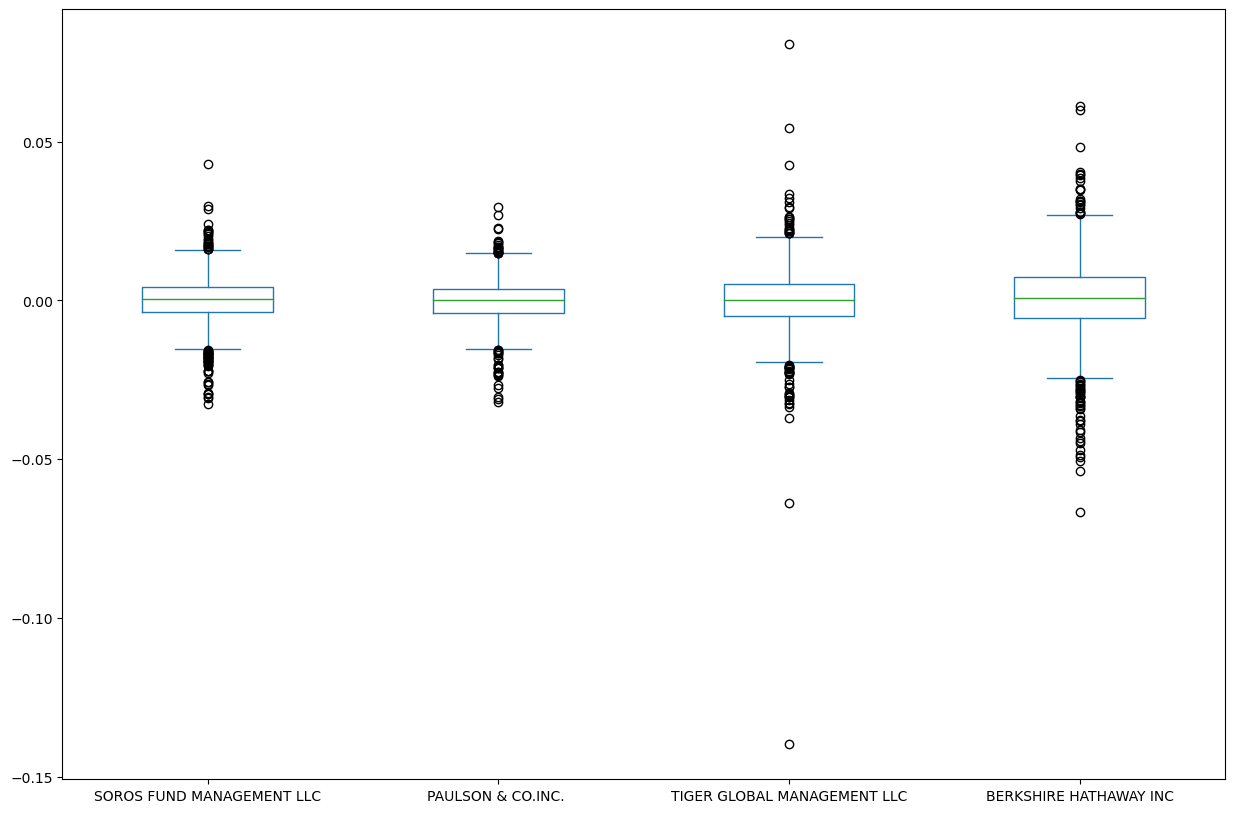

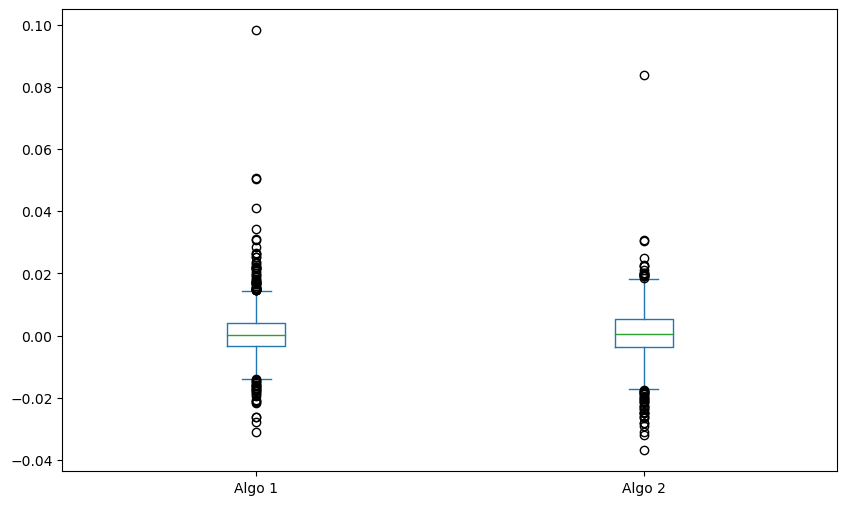

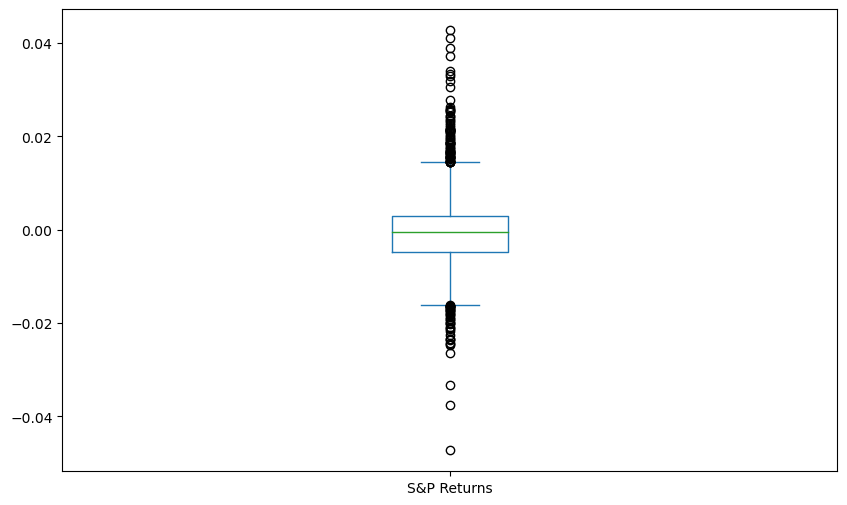

In [19]:
# Box plot to visually show risk
whale_returns.plot(kind="box", figsize=(15,10))
algorithmic_returns.plot(kind="box", figsize=(10,6))
sp500_closing_returns.plot(kind="box", figsize=(10,6))

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
whale_daily_std = whale_returns.std()



In [21]:
whale_daily_std.head()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [22]:
algo_daily_std = algorithmic_returns.std()
algo_daily_std.head()

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [23]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_std = sp500_closing_returns.std()
sp500_daily_std.head()
# Determine which portfolios are riskier than the S&P 500
combined_returns_std = combined_returns.std().sort_values(ascending=False)
combined_returns_std.head(7)

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P Returns                    0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

### Calculate the Annualized Standard Deviation

In [24]:
# Calculate the annualized standard deviation (252 trading days)
combined_annualized_std = combined_returns_std * np.sqrt(252)
combined_annualized_std.head(7)

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
S&P Returns                    0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

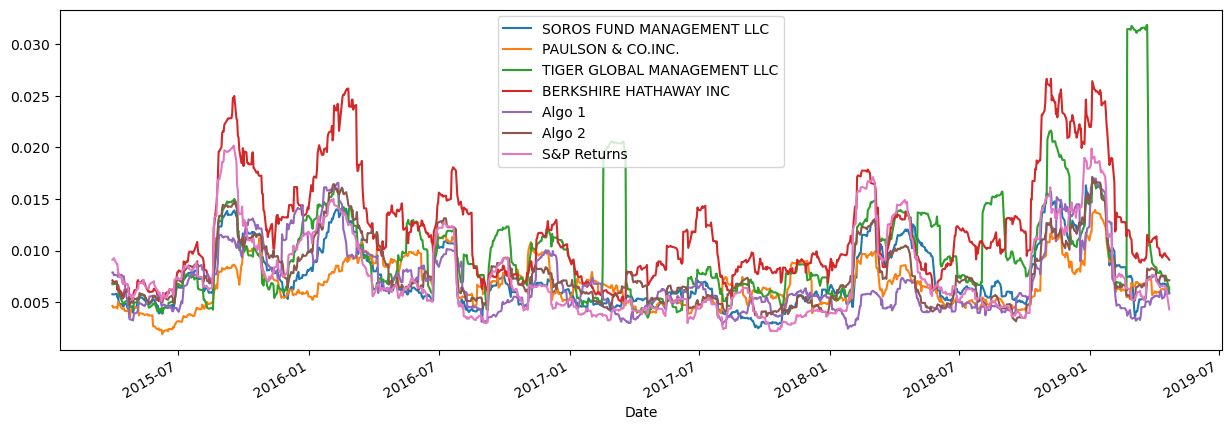

In [25]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_returns.rolling(window=21).std().plot(figsize=(15,5))
# Plot the rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:>

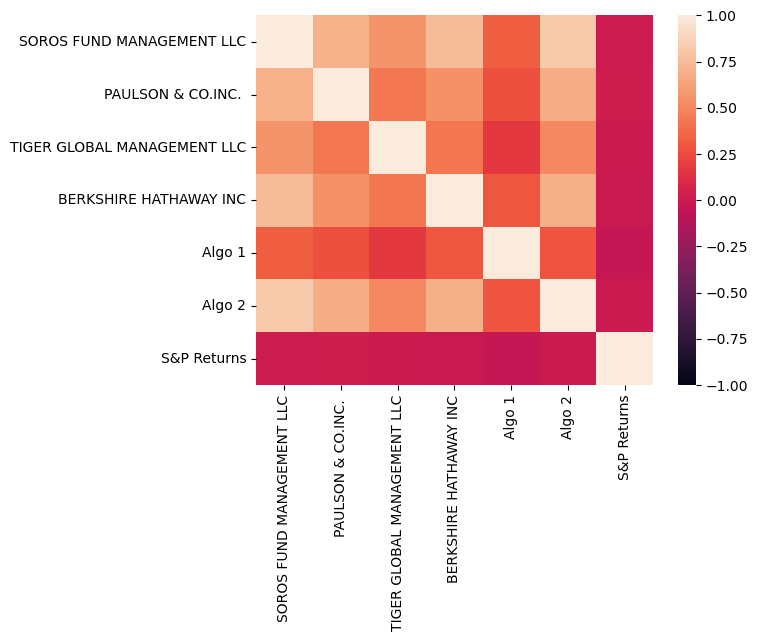

In [26]:
# Calculate the correlation
correlation = combined_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin= -1, vmax= 1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [27]:
# Calculate covariance of a single portfolio
covariance = algorithmic_returns['Algo 1'].cov(combined_returns["S&P Returns"])
# Calculate variance of S&P 500
variance = combined_returns["S&P Returns"].var()
# Computing beta
algo_beta = covariance / variance
algo_beta


-0.03014921454233757

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo 1 Portfolio'}, xlabel='Date'>

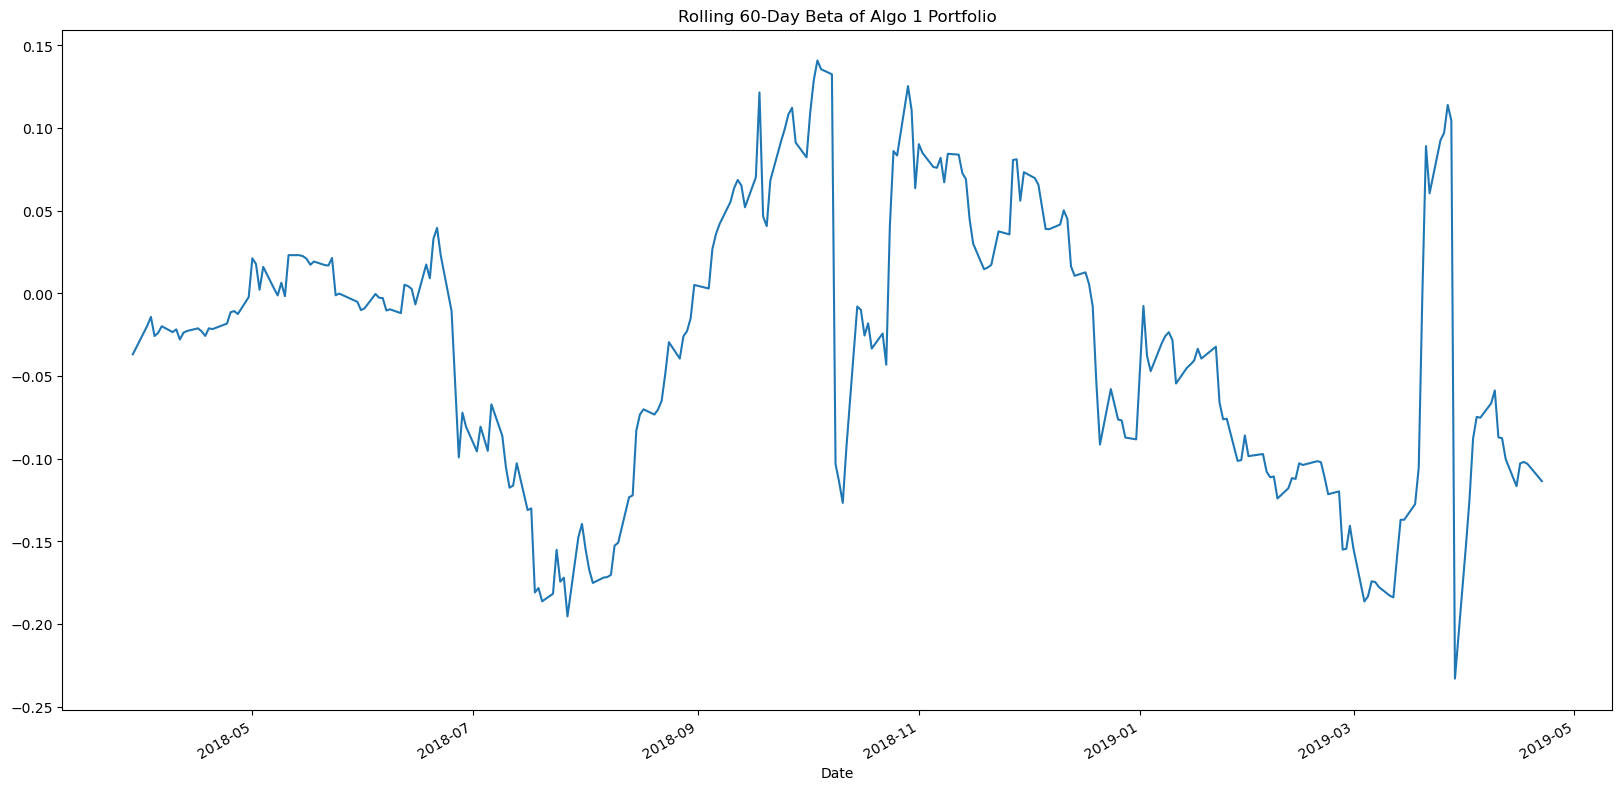

In [54]:
# Plot beta trend
rolling_covariance = algorithmic_returns['Algo 1'].rolling(window=60).cov(combined_returns["S&P Returns"])
rolling_variance = combined_returns["S&P Returns"].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo 1 Portfolio')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

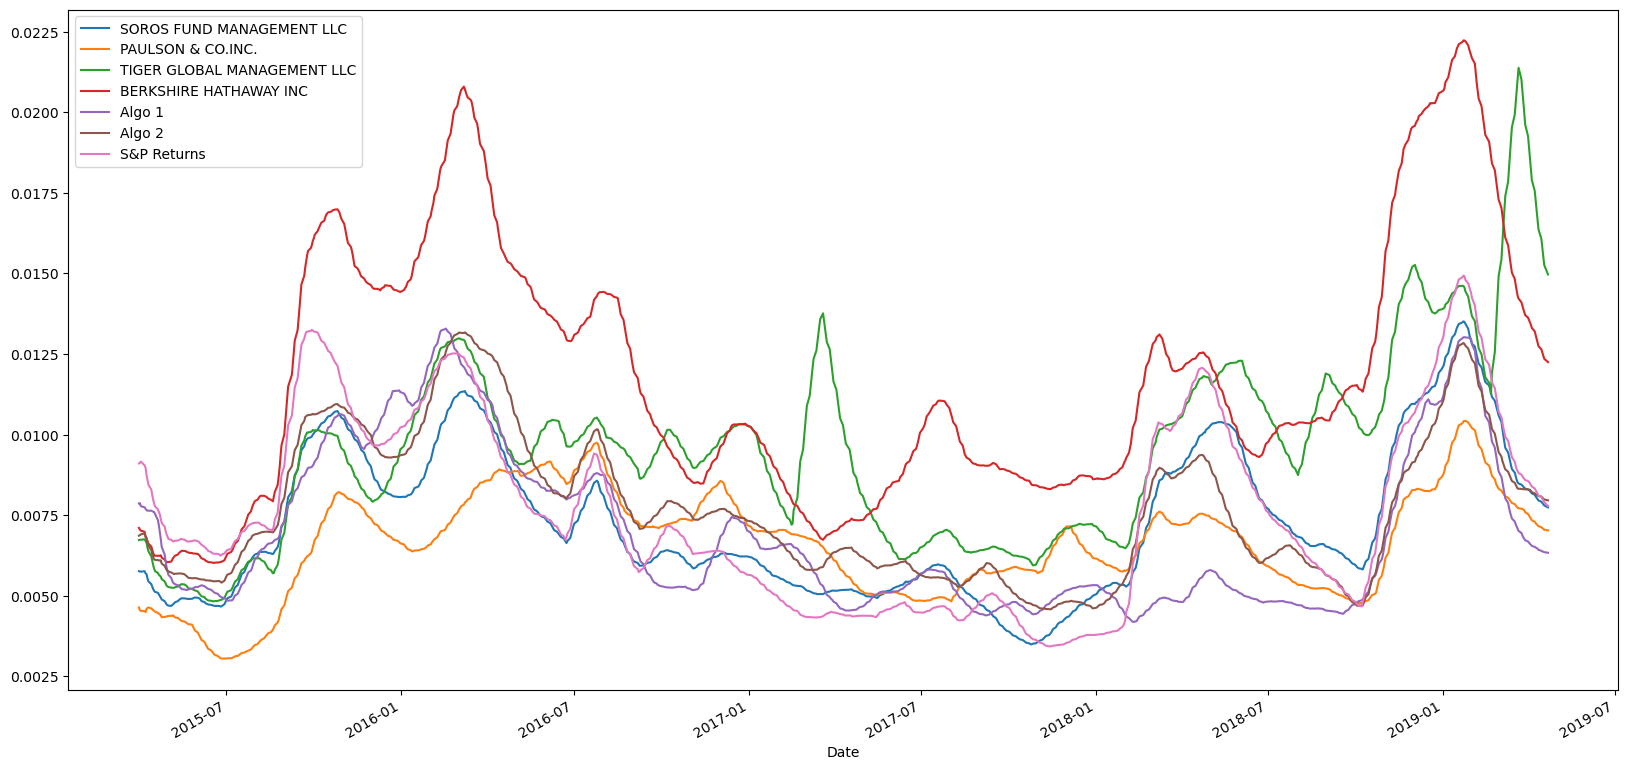

In [29]:
# Use `ewm` to calculate the rolling window
df_std = combined_returns.rolling(window=21).std()
df_ewm_std = df_std.ewm(halflife=21).mean().dropna()
df_ewm_std.plot(figsize = (20, 10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [30]:
# Annualized Sharpe Ratios
sharpe_ratios = ((combined_returns.mean()* 252) / (combined_returns.std() * np.sqrt(252)))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P Returns                   -0.518582
dtype: float64

<AxesSubplot:title={'center':'Portfolio Sharpe Ratios'}>

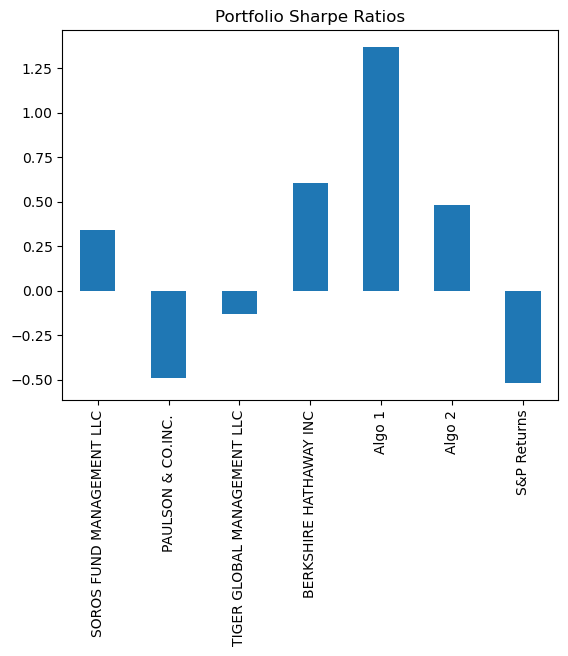

In [31]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Portfolio Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Based on the Sharpe Ratio calcuations Algo 1 Portfolio strategy looks to vastly outperform both the S&P 500 and the Whales portfolios. Algo 2 Portfolio looks to outperform the S&P 500 and all whales with the exception of Berkshire Hathaway Inc.  

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [32]:
# Set path for data files
aapl_data = Path("Resources/aapl_historical.csv")
amzn_data = Path("Resources/amzn_historical.csv")
gild_data = Path("Resources/gild_historical.csv")
msft_data = Path("Resources/msft_historical.csv")
rytm_data = Path("Resources/rytm_historical.csv")

In [33]:
# Reading data from stocks
aapl_df = pd.read_csv(aapl_data, index_col='Date', parse_dates=True, infer_datetime_format=True)
amzn_df = pd.read_csv(amzn_data, index_col='Date', parse_dates=True, infer_datetime_format=True)
gild_df = pd.read_csv(gild_data, index_col='Date', parse_dates=True, infer_datetime_format=True)
msft_df = pd.read_csv(msft_data, index_col='Date', parse_dates=True, infer_datetime_format=True)
rytm_df = pd.read_csv(rytm_data, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [34]:
# Reset 'Date' index
aapl_df.index = aapl_df.index.to_period('D')
amzn_df.index = amzn_df.index.to_period('D')
gild_df.index = gild_df.index.to_period('D')
msft_df.index = msft_df.index.to_period('D')
rytm_df.index = rytm_df.index.to_period('D')

In [35]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([aapl_df, amzn_df, gild_df, msft_df, rytm_df], axis = 'columns', join = 'inner')
#combined_df.sort_index(inplace= True)
combined_df.head()

,Close,Close,Close,Close,Close
Date,,,,,
2018-01-02,43.07,59.45,74.10,85.95,28.00
2018-01-03,43.06,60.21,74.66,86.35,29.34
2018-01-04,43.26,60.48,73.90,87.11,28.13
2018-01-05,43.75,61.46,74.52,88.19,27.94
2018-01-08,43.59,62.34,74.40,88.28,27.83


In [36]:
# Reorganize portfolio data by having a column per symbol

combined_df.columns = ["AAPL", "AMZN", "GILD", "MSFT", "RYTM"]
combined_df.head()

,AAPL,AMZN,GILD,MSFT,RYTM
Date,,,,,
2018-01-02,43.07,59.45,74.10,85.95,28.00
2018-01-03,43.06,60.21,74.66,86.35,29.34
2018-01-04,43.26,60.48,73.90,87.11,28.13
2018-01-05,43.75,61.46,74.52,88.19,27.94
2018-01-08,43.59,62.34,74.40,88.28,27.83


In [37]:
combined_df = combined_df.reset_index()
combined_df.head()

,Date,AAPL,AMZN,GILD,MSFT,RYTM
0,2018-01-02,43.07,59.45,74.10,85.95,28.00
1,2018-01-03,43.06,60.21,74.66,86.35,29.34
2,2018-01-04,43.26,60.48,73.90,87.11,28.13
3,2018-01-05,43.75,61.46,74.52,88.19,27.94
4,2018-01-08,43.59,62.34,74.40,88.28,27.83


In [38]:
# Change index type to string in order to modify for merge
combined_df['Date'] = combined_df['Date'].astype(str)
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
combined_df.head()

,Date,AAPL,AMZN,GILD,MSFT,RYTM
0,2018-01-02,43.07,59.45,74.10,85.95,28.00
1,2018-01-03,43.06,60.21,74.66,86.35,29.34
2,2018-01-04,43.26,60.48,73.90,87.11,28.13
3,2018-01-05,43.75,61.46,74.52,88.19,27.94
4,2018-01-08,43.59,62.34,74.40,88.28,27.83


In [39]:
# Set index to datetime
combined_df = combined_df.set_index("Date")
combined_df.head()

,AAPL,AMZN,GILD,MSFT,RYTM
Date,,,,,
2018-01-02,43.07,59.45,74.10,85.95,28.00
2018-01-03,43.06,60.21,74.66,86.35,29.34
2018-01-04,43.26,60.48,73.90,87.11,28.13
2018-01-05,43.75,61.46,74.52,88.19,27.94
2018-01-08,43.59,62.34,74.40,88.28,27.83


In [40]:
# Calculate daily returns and drop NAs
port_daily_returns = combined_df.pct_change().dropna()

# Display sample data
port_daily_returns.head(5)

,AAPL,AMZN,GILD,MSFT,RYTM
Date,,,,,
2018-01-03,-0.000232,0.012784,0.007557,0.004654,0.047857
2018-01-04,0.004645,0.004484,-0.010179,0.008801,-0.041241
2018-01-05,0.011327,0.016204,0.008390,0.012398,-0.006754
2018-01-08,-0.003657,0.014318,-0.001610,0.001021,-0.003937
2018-01-09,-0.000229,0.004812,0.049731,-0.000680,-0.055336


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [41]:
# Set weights
weights = [0.2, 0.2, 0.2, 0.2, 0.2]

# Calculate portfolio return
portfolio_returns = port_daily_returns.dot(weights)

# Display sample data
portfolio_returns.head()

Date
2018-01-03    0.014524
2018-01-04   -0.006698
2018-01-05    0.008313
2018-01-08    0.001227
2018-01-09   -0.000340
dtype: float64

<AxesSubplot:xlabel='Date'>

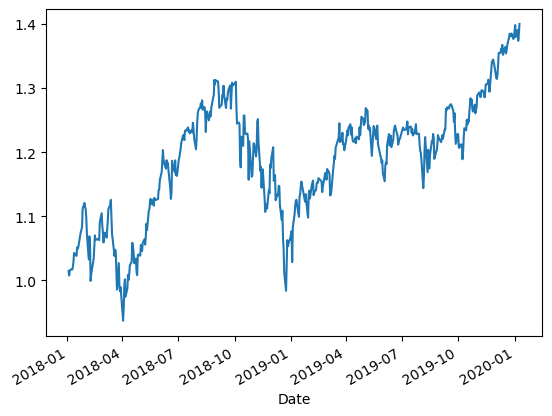

In [42]:
# Calculate Cumulative Returns
my_cumulative_returns = (1 + portfolio_returns).cumprod()
my_cumulative_returns.plot()

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [43]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns["My Returns"] = portfolio_returns
combined_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC        0
PAULSON & CO.INC.                0
TIGER GLOBAL MANAGEMENT LLC      0
BERKSHIRE HATHAWAY INC           0
Algo 1                           0
Algo 2                           0
S&P Returns                      0
My Returns                     716
dtype: int64

In [44]:
combined_returns.sort_index(inplace=True)
combined_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Returns,My Returns
Date,,,,,,,,
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.000513
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.004462
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.006263
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,0.008617
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764,-0.003591


In [45]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns = combined_returns.dropna()
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Returns,My Returns
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,-0.004012,0.014524
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,-0.006985,-0.006698
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.001660,0.008313
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001301,0.001227
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.001113,-0.000340


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [46]:
# Calculate the annualized `std`
combined_returns_std = combined_returns.std().sort_values(ascending=False)
combined_annualized_std = combined_returns_std * np.sqrt(252)
combined_annualized_std

My Returns                     0.273379
BERKSHIRE HATHAWAY INC         0.233851
TIGER GLOBAL MANAGEMENT LLC    0.222843
S&P Returns                    0.162421
SOROS FUND MANAGEMENT LLC      0.150687
Algo 2                         0.140237
Algo 1                         0.121886
PAULSON & CO.INC.              0.117343
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

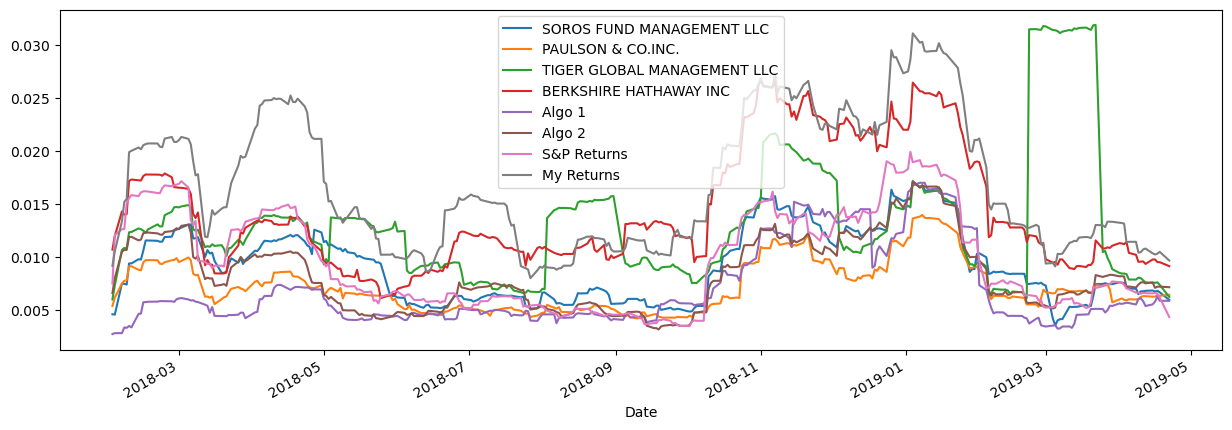

In [47]:
# Calculate rolling standard deviation
combined_returns.rolling(window=21).std()
# Plot rolling standard deviation
combined_returns.rolling(window=21).std().plot(figsize=(15,5))

### Calculate and plot the correlation

<AxesSubplot:>

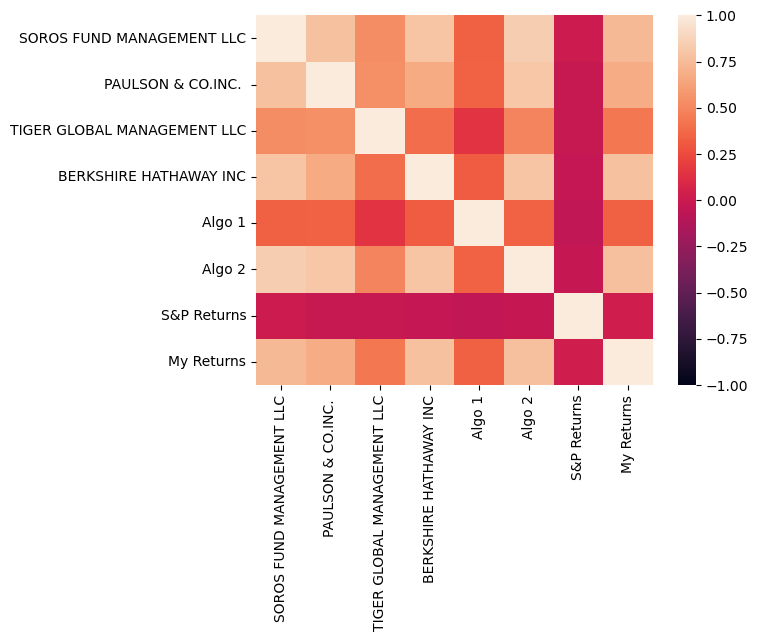

In [48]:
# Calculate the correlation
correlation = combined_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin= -1, vmax= 1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [49]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio
covariance = combined_returns['My Returns'].cov(combined_returns["S&P Returns"])
# Calculate variance of S&P 500
variance = combined_returns["S&P Returns"].var()
# Computing beta
my_returns_beta = covariance / variance
my_returns_beta


0.04684808874391309

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My Returns Portfolio'}, xlabel='Date'>

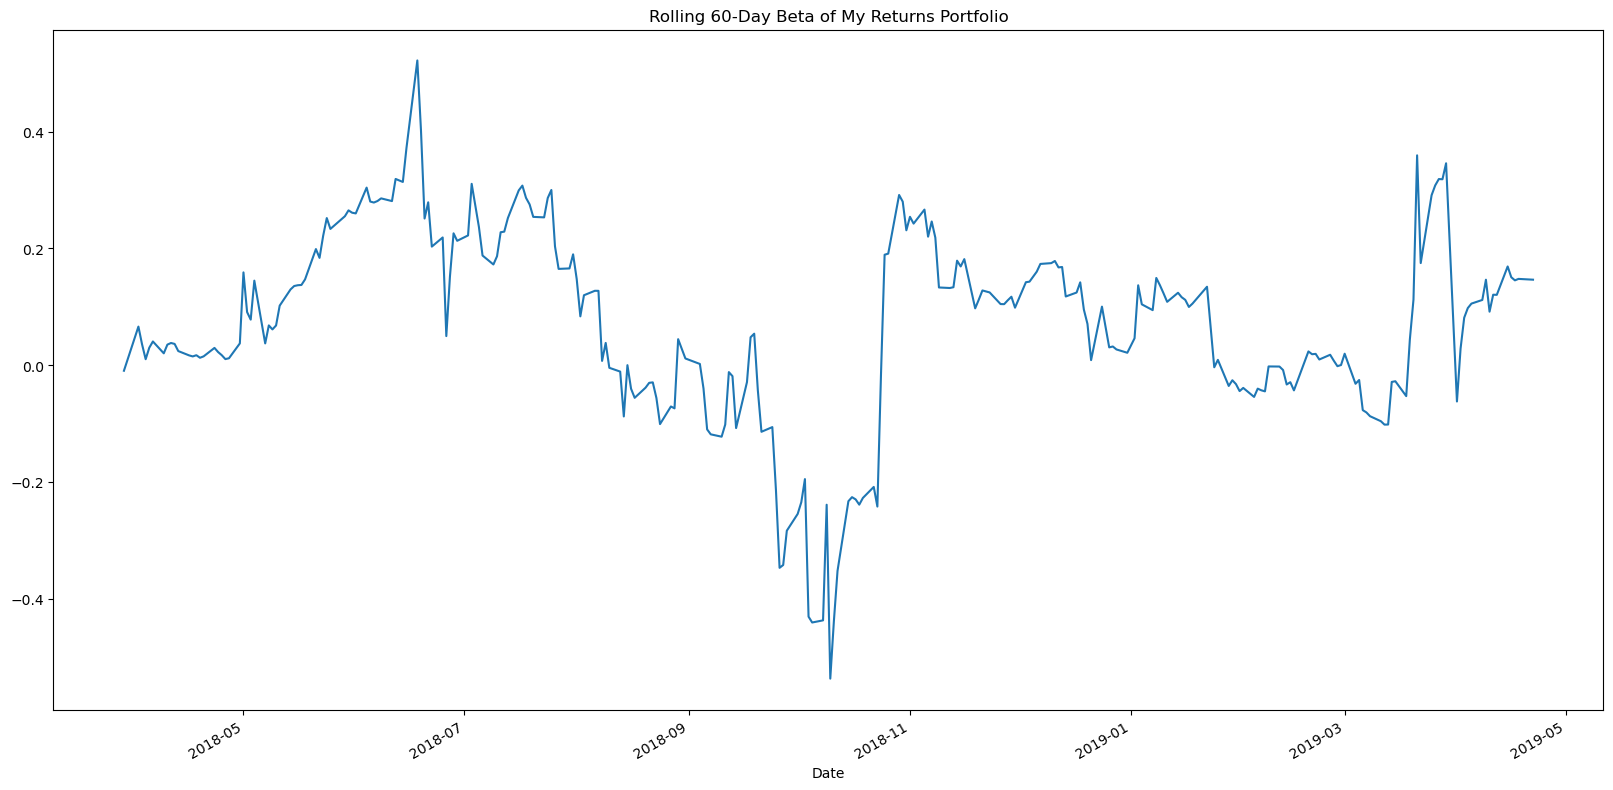

In [53]:
# Plot beta trend
rolling_covariance = combined_returns['My Returns'].rolling(window=60).cov(combined_returns["S&P Returns"])
rolling_variance = combined_returns["S&P Returns"].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of My Returns Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [50]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = ((combined_returns.mean()* 252) / (combined_returns.std() * np.sqrt(252)))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.107071
PAULSON & CO.INC.             -0.232653
TIGER GLOBAL MANAGEMENT LLC   -1.352704
BERKSHIRE HATHAWAY INC         0.396695
Algo 1                         1.904971
Algo 2                         0.188529
S&P Returns                   -0.291352
My Returns                     0.698996
dtype: float64

<AxesSubplot:title={'center':'Portfolio Sharpe Ratios'}>

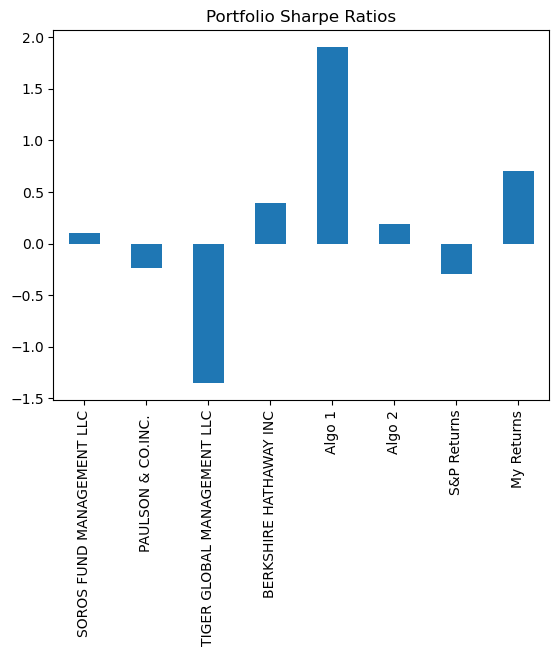

In [51]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Portfolio Sharpe Ratios")

<AxesSubplot:xlabel='Date'>

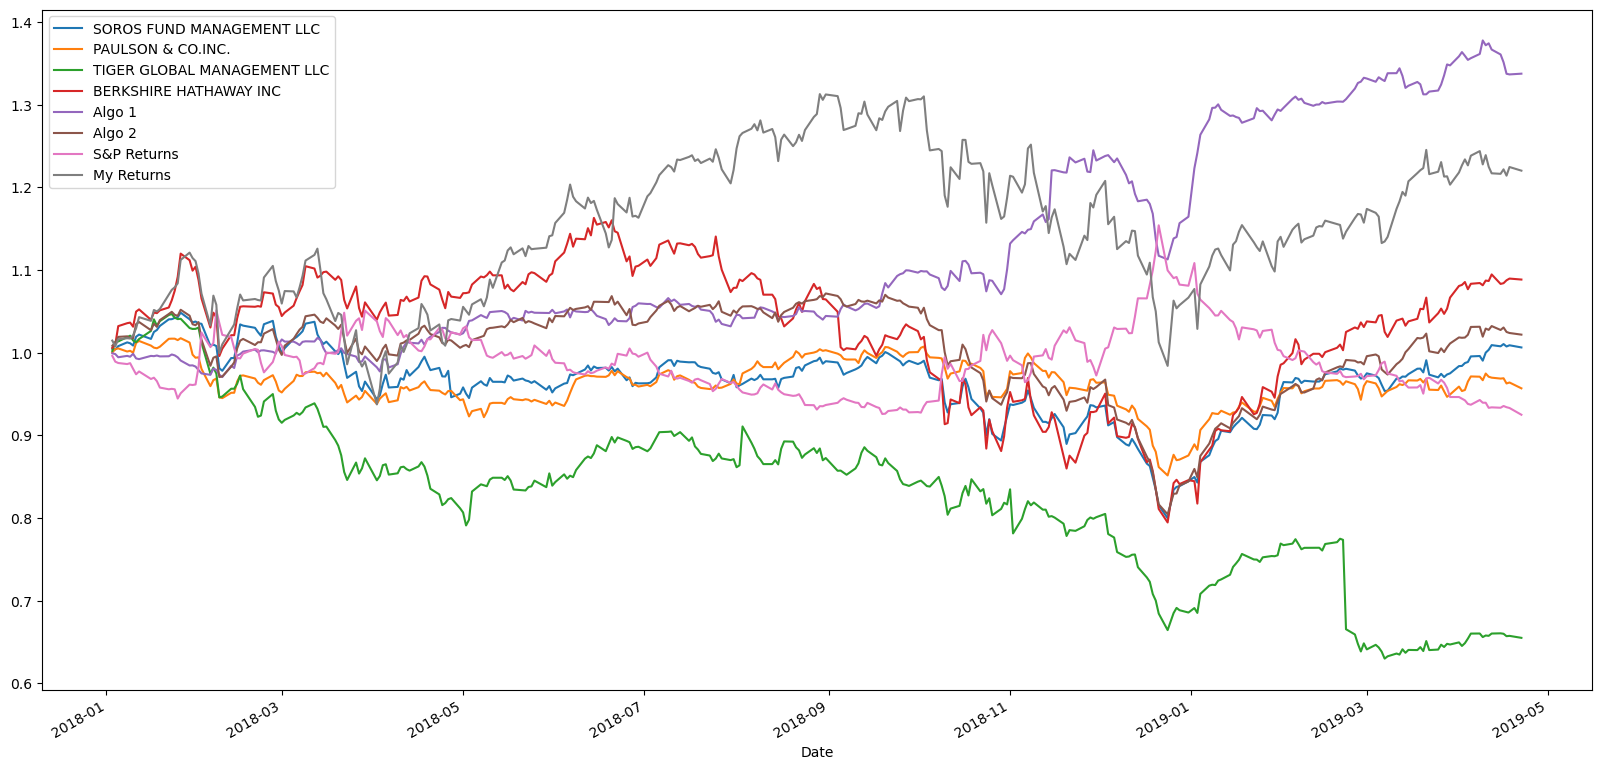

In [52]:
# Cummulative returns of all portfolios during shared period
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod()
# Plot cumulative returns
cumulative_returns.plot(legend=True, figsize = (20,10))

### How does your portfolio do?

Write your answer here!

My portfolio looks to perform second best just behind Algo 1 portfolio. 